## **4장 모델훈련**  #12

사이킷런을 사용하지 않고 넘파이만 사용하여 조기 종료를 사용한 배치 경사 하강법으로 소프트맥스 회귀를 구현해보세요. 이를 붓꽃 데이터셋 같은 분류 작업에 사용해보세요.

In [2]:
import numpy as np
from sklearn.datasets import load_iris

## 관련 수식 및 예제

#### **배치 경사 하강법**

- 비용함수의 gradient vector  
m: 샘플 수, n: 특성 수 → X: mxn 행렬

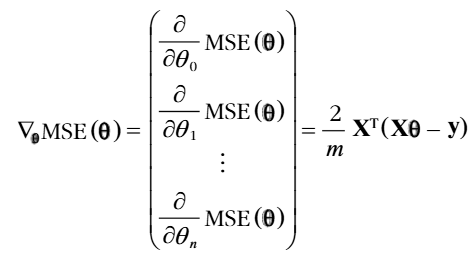

- 경사하강법의 스텝  
$\theta^{(next step)} = \theta - η\nabla_\theta MSE(\theta)$

In [ ]:
# 학습률 η(에타)
eta = 0.1
n_epochs = 1000
m = len(X_b) # 샘플 개수

np.random.seed(42)
# 모델 파라미터 랜덤하게 초기화
theta = np.random.randn(2,1)

for epoch in range(n_epochs):
    # 비용함수의 그레이디언트 벡터
    gradients = 2/m * X_b.T @ (X_b @ theta - y)
    theta = theta - eta * gradients

In [ ]:
# 학습률 η(에타)
eta = 0.1
n_epochs = 1000
m = len(X_b) # 샘플 개수

np.random.seed(42)
# 모델 파라미터 랜덤하게 초기화
theta = np.random.randn(2,1)

for epoch in range(n_epochs):
    # 비용함수의 그레이디언트 벡터
    gradients = 1/m * X_b.T @ (X_b @ theta - y)
    theta = theta - eta * gradients

#### **소프트맥스 회귀**(=다항 로지스틱 회귀)
- 클래스 k에 대한 소프트맥스 점수:
$s_k(X) = (\theta^k)^TX $       
    *파라미터 행렬: $\theta^k$


- 소프트맥스 함수  
$K$: 클래스 수    
$s(X)$: 샘플 X에 대한 각 클래스의 점수를 담은 벡터   
$σ(s(X))_k$: 샘플 X에 대한 각 클래스의 점수가 주어졌을 때 이 샘플이 클래스 k에 속할 추정

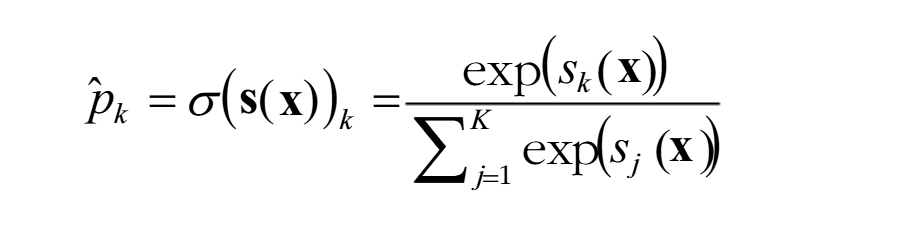

## 문제풀이

- iris 데이터 살펴보기

In [3]:
iris = load_iris(as_frame = True)
list(iris)

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [4]:
iris.data.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [5]:
iris.target.head(3)

,target
0,0
1,0
2,0


In [6]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

- X, y 정의

In [21]:
X = iris.data[['petal length (cm)', 'petal width (cm)']].values
y = iris['target'].values

In [22]:
X_b = np.c_[np.ones(len(X)), X]

- train-test split

In [23]:
test_ratio = 0.2
validation_ratio = 0.2
# 전체 데이터 개수
total_size = len(X_b)

test_size = int(total_size * test_ratio)
validation_size = int(total_size * validation_ratio)
train_size = total_size - test_size - validation_size

np.random.seed(42)
rnd_indices = np.random.permutation(total_size)

X_train = X_b[rnd_indices[:train_size]]
y_train = y[rnd_indices[:train_size]]
X_valid = X_b[rnd_indices[train_size:-test_size]]
y_valid = y[rnd_indices[train_size:-test_size]]
X_test = X_b[rnd_indices[-test_size:]]
y_test = y[rnd_indices[-test_size:]]

- `a`가 넘파이 배열인 경우 `a[[1, 3, 2]]`는 `a[1], a[3]`및 `a[2]`와 동일한 3개의 행을 가진 배열을 반환  
    =>  `배열[[인덱스 배열]]` --> 해당 인덱스의 행을 쌓은 배열이 출력

In [24]:
def to_one_hot(y):
    return np.diag(np.ones(y.max() + 1))[y]

In [25]:
Y_train_one_hot = to_one_hot(y_train)
Y_valid_one_hot = to_one_hot(y_valid)
Y_test_one_hot = to_one_hot(y_test)

- 표준화

In [26]:
mean = X_train[:, 1:].mean(axis=0)
std = X_train[:, 1:].std(axis=0)
# train, valid, test모두 train의 평균과 표편으로 표준화 진행!
X_train[:, 1:] = (X_train[:, 1:] - mean) / std
X_valid[:, 1:] = (X_valid[:, 1:] - mean) / std
X_test[:, 1:] = (X_test[:, 1:] - mean) / std

- 소프트맥스 함수
    - 비용함수   
$J(\mathbf{\Theta}) = \dfrac{1}{m}\sum\limits_{i=1}^{m}\sum\limits_{k=1}^{K}{y_k^{(i)}\log\left(\hat{p}_k^{(i)}\right)}$
    - 그래디언트 방정식  
    $\nabla_{\theta^k} J(\mathbf{\Theta}) = \dfrac{1}{m}\sum\limits_{i=1}^{m}{(\hat{p}_k^{(i)}-y_k^{(i)})X^{(i)}}$  
    $\hat{p}_k^{(i)} > 0 (\because \log\left(\hat{p}_k^{(i)}\right))$ -> ϵ 더하기

In [27]:
def softmax(logits):
    exps = np.exp(logits)
    exp_sums = exps.sum(axis=1, keepdims=True)
    return exps/exp_sums

In [28]:
# 2개의 독립변수와 bias
n_inputs = X_train.shape[1]
# 클래스 갯수
n_outputs = len(np.unique(y_train))

- 모델학습

In [29]:
# 학습률 η(에타)
eta = 0.5
n_epochs = 5001
m = len(X_b) # 샘플 개수
epsilon = 1e-5

np.random.seed(42)
# 모델 파라미터 랜덤하게 초기화
theta = np.random.randn(n_inputs,n_outputs)

for epoch in range(n_epochs):
    logits = X_train @ theta
    y_proba = softmax(logits)

    if epoch % 1000 == 0:
        y_proba_valid = softmax(X_valid @ theta)
        entropy = - (Y_valid_one_hot * np.log(y_proba_valid + epsilon))
        print(epoch, entropy.sum(axis=1).mean())
    error = y_proba - Y_train_one_hot
    # 비용함수의 그레이디언트 벡터
    gradients = 1/m * X_train.T @ error
    theta = theta - eta * gradients

0 3.7085808486476917
1000 0.1554640274924447
2000 0.14161371970592274
3000 0.13269862348408362
4000 0.12565200057742704
5000 0.12011900255608328


- 모델 파라미터

In [30]:
theta

array([[ 0.27563915,  5.40425127, -4.67375204],
       [-5.76092429, -0.04051629,  6.85618011],
       [-4.67397359, -0.08718461,  6.63833136]])

- 예측 및 정확도 점수 확인

In [32]:
logits = X_valid @ theta
y_proba = softmax(logits)
# 확률이 제일 높은 인덱스-> 해당 클래스로 예측
y_predict = y_proba.argmax(axis=1)

accuracy = (y_predict == y_valid).mean()
accuracy

0.9333333333333333

- L2 규제 추가

In [33]:
eta = 0.5
n_epochs = 5001
m = len(X_train)
epsilon = 1e-5
alpha = 0.01  # 규제 하이퍼파라미터

np.random.seed(42)
Theta = np.random.randn(n_inputs, n_outputs)

for epoch in range(n_epochs):
    logits = X_train @ Theta
    Y_proba = softmax(logits)
    if epoch % 1000 == 0:
        Y_proba_valid = softmax(X_valid @ Theta)
        xentropy_losses = -(Y_valid_one_hot * np.log(Y_proba_valid + epsilon))
        l2_loss = 1 / 2 * (Theta[1:] ** 2).sum()
        total_loss = xentropy_losses.sum(axis=1).mean() + alpha * l2_loss
        print(epoch, total_loss.round(4))
    error = Y_proba - Y_train_one_hot
    gradients = 1 / m * X_train.T @ error
    gradients += np.r_[np.zeros([1, n_outputs]), alpha * Theta[1:]]
    Theta = Theta - eta * gradients

0 3.7372
1000 0.3259
2000 0.3259
3000 0.3259
4000 0.3259
5000 0.3259


- L2 규제 추가: 정확도 확인

In [34]:
logits = X_valid @ Theta
Y_proba = softmax(logits)
y_predict = Y_proba.argmax(axis=1)

accuracy_score = (y_predict == y_valid).mean()
accuracy_score

0.9333333333333333

- 조기 종료 추가

In [35]:
eta = 0.5
n_epochs = 50_001
m = len(X_train)
epsilon = 1e-5
C = 100  # 규제 하이퍼파라미터
best_loss = np.infty

np.random.seed(42)
Theta = np.random.randn(n_inputs, n_outputs)

for epoch in range(n_epochs):
    logits = X_train @ Theta
    Y_proba = softmax(logits)
    Y_proba_valid = softmax(X_valid @ Theta)
    xentropy_losses = -(Y_valid_one_hot * np.log(Y_proba_valid + epsilon))
    l2_loss = 1 / 2 * (Theta[1:] ** 2).sum()
    total_loss = xentropy_losses.sum(axis=1).mean() + 1 / C * l2_loss
    if epoch % 1000 == 0:
        print(epoch, total_loss.round(4))
    if total_loss < best_loss:
        best_loss = total_loss
    else:
        print(epoch - 1, best_loss.round(4))
        print(epoch, total_loss.round(4), "조기 종료!")
        break
    error = Y_proba - Y_train_one_hot
    gradients = 1 / m * X_train.T @ error
    gradients += np.r_[np.zeros([1, n_outputs]), 1 / C * Theta[1:]]
    Theta = Theta - eta * gradients

0 3.7372
281 0.3256
282 0.3256 조기 종료!


- L2 규제 + 조기 종료: 정확도 점수 확인

In [36]:
logits = X_valid @ Theta
Y_proba = softmax(logits)
y_predict = Y_proba.argmax(axis=1)

accuracy = (y_predict == y_valid).mean()
accuracy

0.9333333333333333

- 테스트 세트에서 정확도 확인


In [37]:
logits = X_test @ Theta
Y_proba = softmax(logits)
y_predict = Y_proba.argmax(axis=1)

accuracy_score = (y_predict == y_test).mean()
accuracy_score

0.9666666666666667